In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
mat_size = [2**x for x in range(5,14)]

In [ ]:
# This will create a list of dataframes that corresponds to the matrix sizes with times for all of them
dfs = []
stat_df = []
stat = False
df = None
# with open("stats.csv", "r") as f:
#     for line in f.readlines():
#         if line.startswith('Name,'):
#             dfs.append(df)
#             df = pd.DataFrame(columns = line.split(','))
            
#         else:
            
#             new_row_values = []
#             for x in line.split(','):
#                 try:
#                     float_value = float(x)
#                     new_row_values.append(float_value)
#                 except ValueError:
#                     pass
                    
#             # Append the new row to the DataFrameline.split(',')
#             new_row_dict = dict(zip(df.columns, new_row_values))
#             # Append the new row to the DataFrame
#             df = df.append(new_row_dict, ignore_index=True)
# dfs = dfs[1:]
# dfs

d = pd.read_csv("stats.csv")

dfs_split = []
unique_keys = d['Name'].unique()
for key in unique_keys:
    df_split = d[d['Name'] == key]
    dfs_split.append(df_split)

# Print the split DataFrames
for df_split in dfs_split:
    df_split.drop(df_split.columns[-1], axis=1, inplace=True)
    df_split.set_index(df_split.columns[0], inplace=True)
    print(df_split['computation time (ms)'].head())
    
    

#sns.lineplot(d['preparing time (ms)'].replace('preparing time (ms)',None))

In [ ]:
# This will create a list of dataframes that corresponds to the matrix sizes with times for all of them
dfs = []
stat_df = []
stat = False
df = None
with open("results.csv", "r") as f:
    for line in f.readlines():
        if line.startswith('MMA CPU '):
            dfs.append(df)
            df = pd.DataFrame(columns = line.split(','))
            
        else:
            
            new_row_values = []
            for x in line.split(','):
                try:
                    float_value = float(x)
                    new_row_values.append(float_value)
                except ValueError:
                    pass
                    
            # Append the new row to the DataFrameline.split(',')
            new_row_dict = dict(zip(df.columns, new_row_values))
            # Append the new row to the DataFrame
            df = df.append(new_row_dict, ignore_index=True)

dfs = dfs[1:]
dfs[-1].head()

In [ ]:
names = ['CPU', 'CudaGM', 'CudaSM', 'TensorGM',  'TensorSM']
indexes = ['Loading', 'Computing', 'Output', 'Total']
dfs_mean = []
for df in dfs:
    df_mean = pd.DataFrame(columns=names, index=indexes)
    j = 0
    for row in df_mean.index:
        i = j
        for col in df_mean.columns:
            if row == 'Total':
                df_mean.loc[row, col] = df_mean.loc[:, col].sum()
            else:
                df_mean.loc[row, col] = df.iloc[:, i].mean()


            i += 3
        j += 1
    
    dfs_mean.append(df_mean)




In [ ]:
for df in dfs_mean:
    print(df)

In [ ]:
import seaborn as sns
for df in dfs_mean:
    sns.scatterplot(data = df.loc['Total'])

In [ ]:

dfs_mean.pop()
dfs_dea = dfs_mean[1::2]
dfs = dfs_mean[::2] # keep only those without deallocation, # different sizez bc the last dea failed

dfs

In [ ]:
s = dict()
for df in dfs:
    for col in df.columns:
        if col == 'CPU':continue
        if col not in s:
            s[col] = list()
        s[col].append(df[col]['Computing']*1000)
        
g = sns.lineplot(data = s)
g.set_xticks(range(len(mat_size)))
g.set_xticklabels(mat_size)

g.set_xlabel('Matrix Size')
g.set_ylabel('Computation Time (s)')


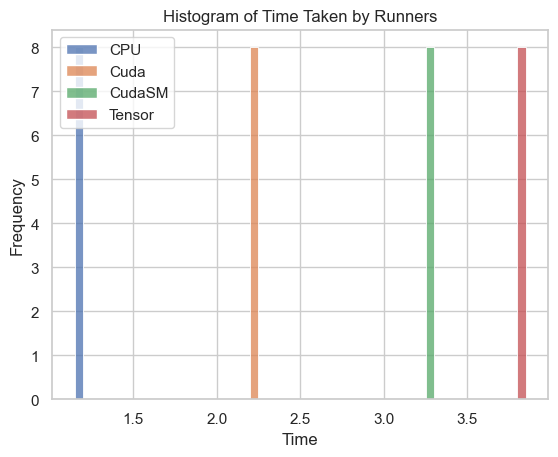

In [385]:
import matplotlib.pyplot as plt
df = pd.DataFrame(columns=['CPU', 'Cuda', 'CudaSM', 'Tensor'], index=mat_size[:-1])

df.loc[:,'CPU'] = [1,1,1,1,1,1,1,1]
df.loc[:,'Cuda'] = [2,2,2,2,2,2,2,2]
df.loc[:,'CudaSM'] = [3,3,3,3,3,3,3,3]
df.loc[:,'Tensor'] = [4,4,4,4,4,4,4,4]
df

#sns.histplot(x = df.index,y = df.columns, multiple='dodge', shrink = 0.4)
# Create the histogram
sns.histplot(data=df, bins='auto', multiple='dodge', shrink = 0.4)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time Taken by Runners')

# Show the plot
plt.show()